# ***Ejemplo Clasificación de Iris Data Set (3 características)***
# ***Usando Perceptrón y Adaline***
# ***Incluyendo Métricas de Desempeño (Matriz de Confusión)***

El objetivo de este ejercicio, es poder ampliar el espectro del Perceptrón y no solo dejar la idea vaga de que solo se puede usar 2 características para la clasificación, por el contrario, se pueden usar cuantas se deseen, para este ejercicio, se ha usado a propósito (3) para mirar el funcionamiento y final solución que debe de conllevar a una superficie de separación tipo Plano.

Esta versión usa el algoritmo de clase **Perceptron**:


*   Permite escoger la **función de activación** a usar: Step function o Bipolar Step function. [Por defecto Bipolar Step function]

*   Permite seleccionar **entre dos métodos para la inicialización de los pesos sinápticos y bias aleatorios**. Uno más eficiente que el otro, con el objetivo de poder visualizar el cambio en el error por cada época de entrenamiento y así la complejidad en la convergencia del algoritmo. [Por defecto el método más óptimo]


Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 5


Partiendo de la idea, de que ya se ha realizado un EDA previo, se sabe que las características que permiten la mejor separabilidad en las clases Iris Setosa e Iris Versicolor son:

1.   Longitud del sépalo. [LS]
2.   Ancho del sépalo. [AS]
3.   Largo del pétalo. [LP]

Por tanto, para este ejercicio, se usa exclusivamente estas tres características.

Recuerde que solo se usan dos clases:

*   Iris Setosa
*   Iris Versicolor

Dado que el perceptrón por su naturaleza propia, solo permite la clasificación BINARIA.





Se grafican los datos mencionados:

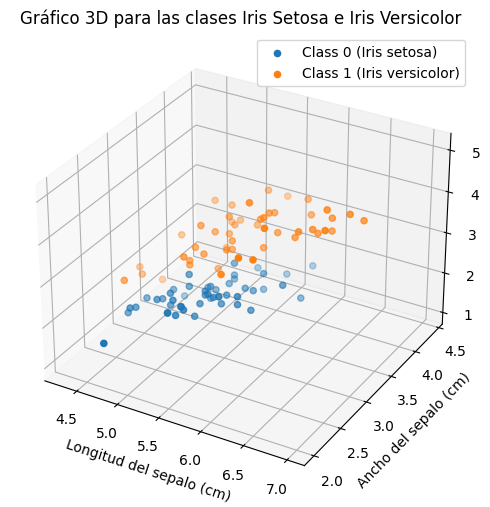

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
titulos = ['Longitud del sepalo (cm)','Ancho del sepalo (cm)','Longitud del petalo (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Crear una figura tridimensional
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar las dos clases en el espacio tridimensional
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], label=f'Class {int(label)} (Iris {iris.target_names[int(label)]})')

# Etiquetas de los ejes
ax.set_xlabel(titulos[0])
ax.set_ylabel(titulos[1])
ax.set_zlabel(titulos[2])

# Título de la gráfica
ax.set_title('Gráfico 3D para las clases Iris Setosa e Iris Versicolor')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

Con el objetivo de explorar mejor la distribución de los datos, se presenta un gráfico interactivo en el cual podrá graduar dos angulos para visualizar mejor los datos:

Si usa en angle1 = 230° y angle 2= 140°, podra observar como efectivamente la distribución de los datos para ambas clases permite ver que hay una fácil separación lineal, lo que indicaría que el Perceptrón puede solucionar este ejercicio planteado.

## **Codigo para grafica tridimensional Interactiva**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from ipywidgets import interact, fixed

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Función para graficar el scatter plot
def plot_3d_scatter(angle1, angle2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for label in np.unique(y):
        ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], label=f'Class {int(label)} (Iris {iris.target_names[int(label)]})')

    ax.set_xlabel(titulos[0])
    ax.set_ylabel(titulos[1])
    ax.set_zlabel(titulos[2])

    ax.set_title('Gráfico 3D para las clases Iris Setosa e Iris Versicolor')

    ax.legend()

    ax.view_init(angle1, angle2)  # Establecer ángulos de vista

    plt.show()

# Utilizar interact para crear una visualización interactiva
interact(plot_3d_scatter, angle1=(0, 360, 10), angle2=(0, 360, 10))


interactive(children=(IntSlider(value=180, description='angle1', max=360, step=10), IntSlider(value=180, descr…

<function __main__.plot_3d_scatter(angle1, angle2)>

Para una interacción total, se desarrolla el gráfico TRIDIMENSIONAL para explorar los datos a un mayor detalle:

In [3]:
import plotly.graph_objs as go
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=titulos[0]),
        yaxis=dict(title=titulos[1]),
        zaxis=dict(title=titulos[2])
    ),
    title='Gráfico 3D para las clases Iris Setosa e Iris Versicolor'
)

# Mostrar la figura interactiva
fig.show()


Se procede con la clasificación cargando de nuevo los datos para ser organizados rapidamente:

In [4]:
from ipywidgets import interact, fixed

In [5]:
# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


La solución a plantear del Perceptrón es:

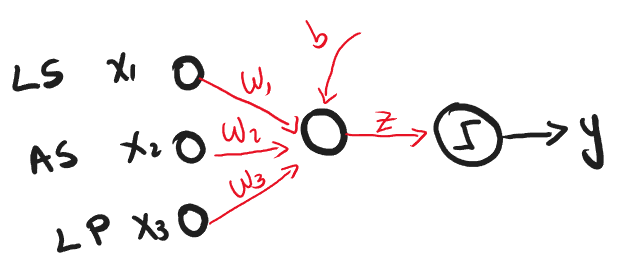

Se separa la matriz de características X, en este caso con 3 características:

In [6]:
# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values

print(X)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

Se separa el vector de clases verdaderas y:

**(Observe que se saturó el valor de y entre 0 y 1), por tanto es claro que más adelante, bien sea perceptrón o adaline a usar debo de configurarlo en "step_function" en lo que respecta con la función de activiación, es decir escalón binario unipolar.**



In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = class_0_1_data['target'].values
y = np.where(y==0,0,1)

print(y)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# **Separación del Dataset**

En esta ocasión y en función de poder evaluar más adelante el Desempeño de mis dos máquinas que entrenare: Perceptrón y Adaline, se realiza la partición del dataset en Training Dataset (train) y Testing Dataset (test), siguiendo el ya conocido esquema:

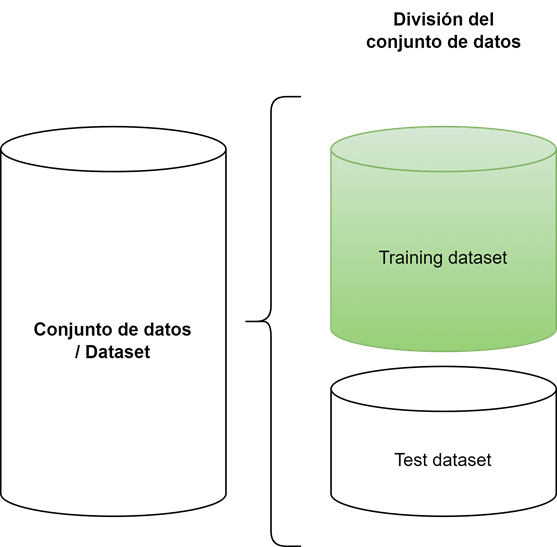

Observe que a continuación se usa la función "train_test_split" de la librería scikit-learn (Librería de aprendizaje automático para Python).

La división propuesta esta basada en una metodología **80:20**, de tal suerte que:

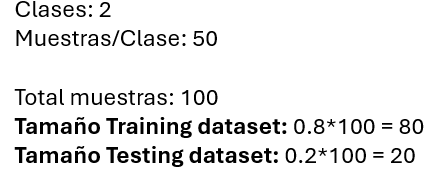

El gráfico siguiente representa con claridad, lo propuesto:

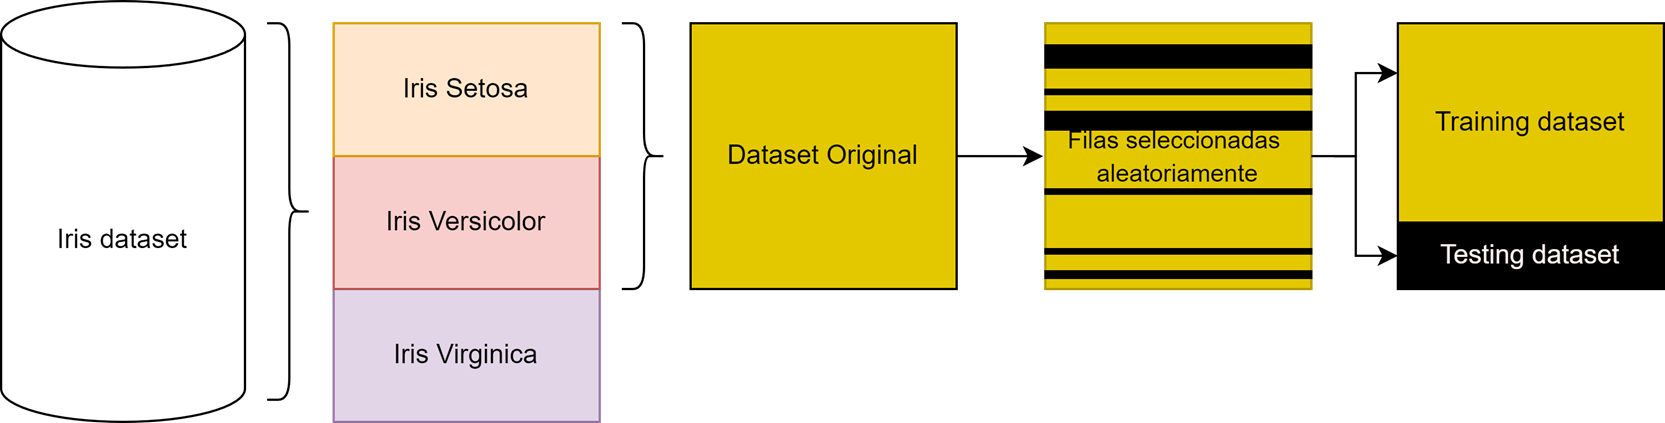

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

Por tanto, la anterior celda de código, permite ver como se han generado 4 nuevas matrices:



*   **x_train**: dimensión resultante: 80 filas x 3 columnas
*   **y_train**: dimensión resultante: 1 filas x 80 columnas
*   **x_test**: dimensión resultante: 20 filas x 3 columnas
*   **y_test**: dimensión resultante: 1 filas x 20 columnas


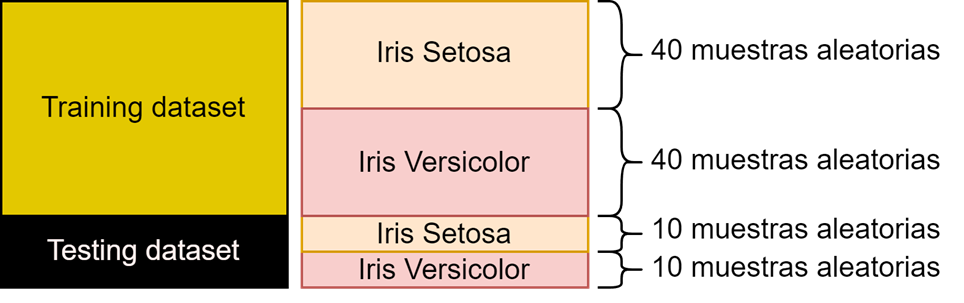




In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(20, 3)
(80,)
(20,)


Clase **Perceptron**

Documentada mediante comentarios:

In [10]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

# **1-Entrenamiento de modelo de aprendizaje de máquina tipo Perceptrón:**

Se procede a entrenar un **Peceptrón #1 (ppn_1)** bajo las siguientes características:

1.   Rw = 0, esperando sea la mejor selección de pesos aleatorios que den solución al problema.
2.   eta = 0.1
3.   n_iter = 20
4.   Af = 'step_function', debido a que mi y_train lo tengo saturado entre 0 y 1



In [11]:
ppn_1 =Perceptron(eta=0.4, n_iter=20, Af='step_function', Rw=0)

In [12]:
ppn_1.fit(x_train,y_train)

Se observa la variabilidad de los valores de bias, w1, w2 y w3 a lo largo de cada iteración:

In [13]:
print(ppn_1.w_historical)

[array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.60611756, -1.72528172,  2.78927031]), array([-0.38375655, -0.

Se observa como la convergencia no es tan rápida hasta alcanzar el valor de 0:

In [14]:
print(ppn_1.errors_)

[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Se realiza un gráfico del error para observar el desempeño a lo largo de las épocas:

Text(0, 0.5, 'Número de actualizaciones')

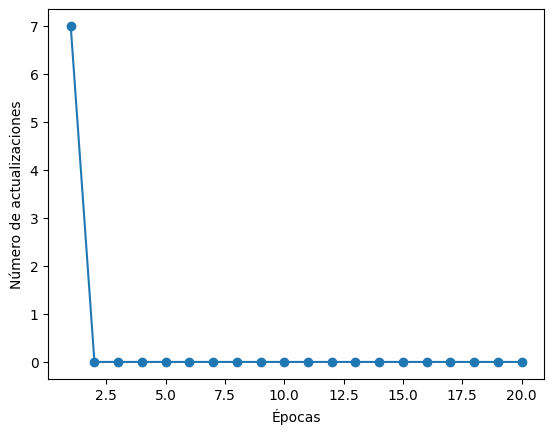

In [15]:
plt.plot(range(1, len(ppn_1.errors_) + 1), ppn_1.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

De manera analítica, se evalua la variabilidad de los **hiperparámetros ** bias, w1, w2 y w3 en función de las iteraciones hasta llegar la convergencia (Solución del algoritmo) cuando el error es igual a 0:

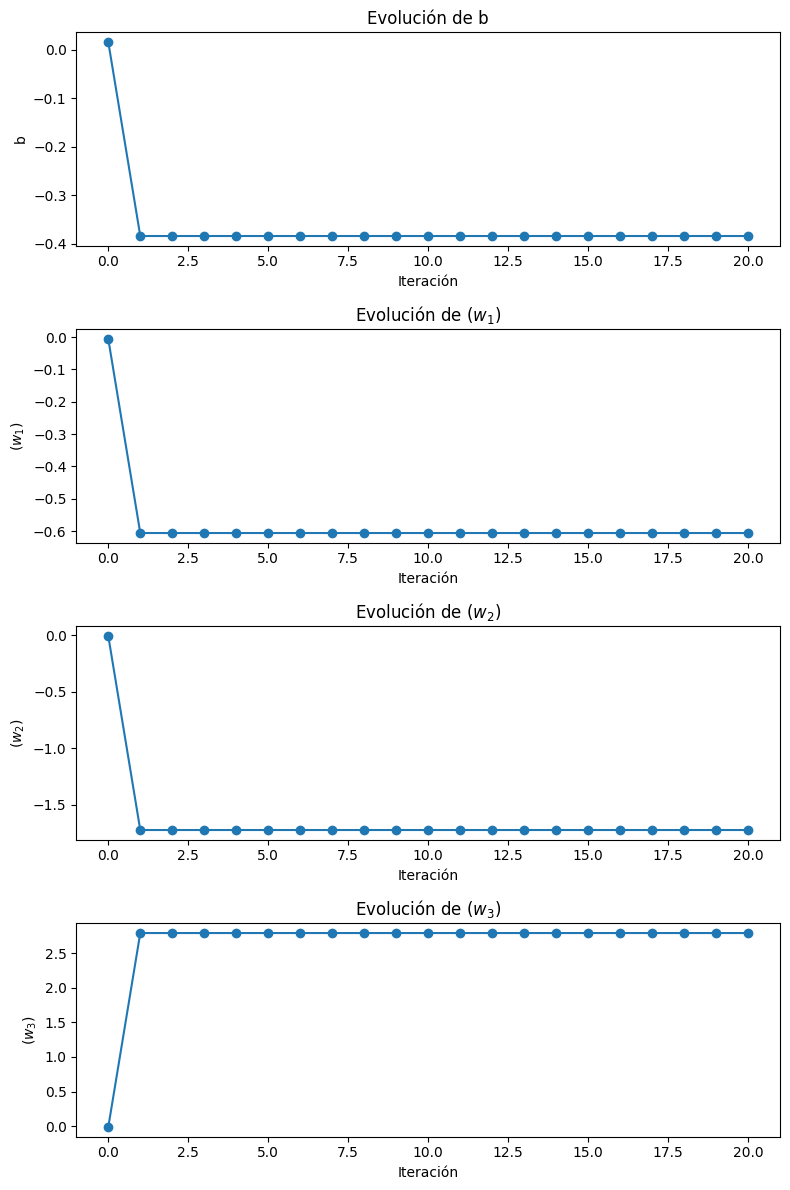

In [16]:
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)', '($w_3$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn_1.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn_1.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

A continuación se puede observar los valores finales de los pesos sinápticos y bias que están distribuidos de la siguiente manera:


*   **w_historial[-1][0]** = bias
*   **w_historial[-1][1]** = w1
*   **w_historial[-1][2]** = w2
*   **w_historial[-1][3]** = w3



In [17]:
print(ppn_1.w_historical[-1])

[-0.38375655 -0.60611756 -1.72528172  2.78927031]


Se procede a graficar el plano resultante:

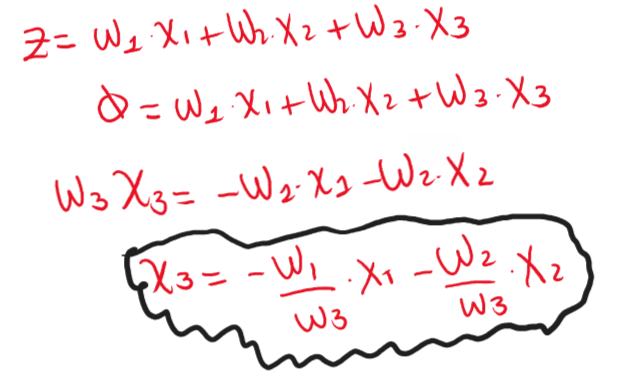



Graficación del hiperplano de separabilidad generado por **Peceptrón #1 (ppn_1)** en el que solo se ha graficado los valores de x_train y y_train, dando solución al espacio de datos que pudo conocer el Perceptrón en el entrenamiento.

Por tanto, existen 40 muestras de una clase pintadas y las otras 40 muestras de la otra clase pintadas.

Tengamos presente que x_test nunca fue conocido en el proceso de entrenamiento.

In [18]:
import plotly.graph_objs as go
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
best_features_titles = ['Longitud del Sépalo (cm)', 'Ancho del Sépalo (cm)', 'Longitud del Pétalo (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

b=ppn_1.w_historical[-1][0]
w1=ppn_1.w_historical[-1][1]
w2=ppn_1.w_historical[-1][2]
w3=ppn_1.w_historical[-1][3]


# Crear puntos para el plano
x_plane = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10)
y_plane = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y_train):
    fig.add_trace(go.Scatter3d(
        x=x_train[y_train == label, 0],
        y=x_train[y_train == label, 1],
        z=x_train[y_train == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Añadir el plano
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=titulos[0]),
        yaxis=dict(title=titulos[1]),
        zaxis=dict(title=titulos[2])
    ),
    title='Gráfico 3D para las clases Iris Setosa e Iris Versicolor'
)

# Mostrar la figura interactiva
fig.show()


# **Pintando los datos de x_test:**

Observe como a continuación se ha realizado exactamente el mismo gráfico anterior, solo que se han incluido las 20 muestras de testeo (x_test):

1.   10 pertenecientes a la clase 0 (Iris Setosa) - Pintadas en color amarillo
2.   10 pertenecientes a la clase 1 (Iris Versicolor) - Pintadas en color negro

Evidentemente, se puede percatar, como la solución brindada por **Peceptrón #1 (ppn_1)** permite perfectamente generar una separabilidad entre ambas clases incluso para las datos de testeo (QUE JAMÁS FUERON INCLUIDOS EN EL PROCESO DE ENTRENAMIENTO).

**Esto detona justamente lo que se quisiera tener en la vida real cuando se hace una entrenamiento de aprendizaje puntual sobre un problema en particular.**

Por supuesto, si voy ha aplicar métricas para evaluar el desempeño di modelo en este caso, será perfectamente esperable que los resultados sean totalmente perfectos, dado que visualmente se vé que la máquina no se equivocará para ninguna de las muestras.



In [19]:
import plotly.graph_objs as go
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
best_features_titles = ['Longitud del Sépalo (cm)', 'Ancho del Sépalo (cm)', 'Longitud del Pétalo (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Aquí debes definir adecuadamente tus valores x_test y y_test
# Supongamos que ya tienes definidos tus datos de prueba
x_test = x_test
y_test = y_test

# Crear puntos para el plano
x_plane = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10)
y_plane = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de entrenamiento
for label in np.unique(y_train):
    fig.add_trace(go.Scatter3d(
        x=x_train[y_train == label, 0],
        y=x_train[y_train == label, 1],
        z=x_train[y_train == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Añadir los puntos de prueba
for label in np.unique(y_test):
    fig.add_trace(go.Scatter3d(
        x=x_test[y_test == label, 0],
        y=x_test[y_test == label, 1],
        z=x_test[y_test == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]}) TEST'
    ))

# Añadir el plano
# Aquí debes definir adecuadamente los coeficientes del plano (w1, w2, w3, b)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features_titles[0]),
        yaxis=dict(title=best_features_titles[1]),
        zaxis=dict(title=best_features_titles[2])
    ),
    title='Gráfico 3D para las clases Iris Setosa e Iris Versicolor'
)

# Mostrar la figura interactiva
fig.show()


# Evaluando a **Peceptrón #1 (ppn_1)** :

Evaluar el modelo entrenado **Peceptrón #1 (ppn_1)** con los valores de el **Testing Dataset** para validar posteriormente el desempeño del modelo.

In [20]:
y_predictions_ppn_1 = ppn_1.predict(x_test)

print(y_predictions_ppn_1)
print(y_test)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


A continuación, usando la matriz de confusión de la librería de ciencia de datos scikit-learn, se procede a calcular la matriz de confusión:

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm_ppn_1 = confusion_matrix(y_test, y_predictions_ppn_1)

print(cm_ppn_1)

[[10  0]
 [ 0 10]]


Se procede a graficar:

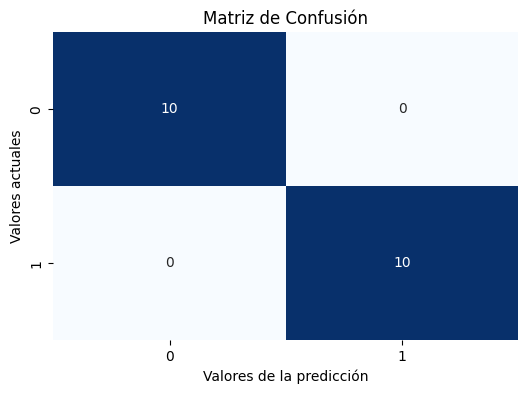

In [22]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

En la imagen anterior, se puede ver con claridad el resultado de la matriz de confusión, pero si se **OBSERVA CON DETALLE**, a diferencia de la matriz de confusión presentada en el aula de clase, los valores de predicción y los valores actuales, se encuentran en posiciones inversas a las aprendidas y mostradas aquí abajo:  ***¿Por qué?***

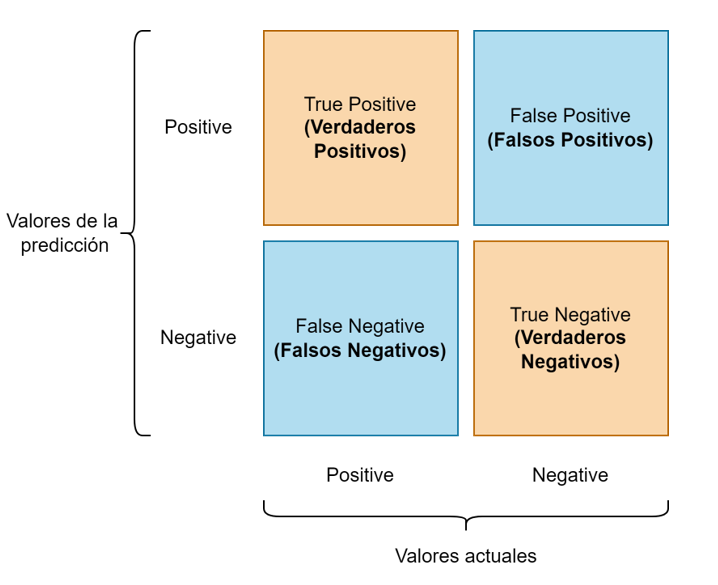


# **ACLARACIÓN VITAL DE LA MATRIZ DE CONFUSIÓN**

Para entender lo anteriormente mencionado, se debe de tener en cuenta lo siguiente:

La librería **scikit-learn** interpreta a la clase con valor numérico 0 como la clase NEGATIVA y la clase con valor numérico 1, como la clase POSITIVA, así las cosas, la organización presentada en clase fué (y seguira siendo en todos los recursos de aprendizaje de máquina así):

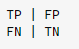

Pero la matriz de confusión aquí obtenida es (aspecto puntual de la librería):

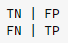


Se creo un objeto llamado *metricas_matriz_confusion* que calcula:



1.   Accuracy
2.   Error_rate
3.   Precision
4.   Recall
5.   Especificity


In [23]:
class metricas_matriz_confusion(object):

  #
    def __init__(self, cm):
        self.TP = cm[1][1]
        self.FP = cm[0][1]
        self.FN = cm[1][0]
        self.TN = cm[0][0]

        self.accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        self.error_rate = (self.FP+self.FN)/(self.TP+self.FP+self.FN+self.TN)
        self.precision = (self.TP)/(self.TP+self.FP)
        self.recall = (self.TP)/(self.TP+self.FN)
        self.especificity = (self.TN)/(self.TN+self.FP)

Se crea el objeto de métricas para este modelo entrenado:

In [24]:
metrics_ppn_1 =metricas_matriz_confusion(cm_ppn_1)

In [25]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

El valor de exactitud (accuracy) es: 1.0
El valor de tasa de error (error_rate) es: 0.0
El valor de precisión (precision) es: 1.0
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 1.0
El valor de especificidad (especificity) es: 1.0


# **2-Entrenamiento de modelo de aprendizaje de máquina tipo Perceptrón:**

Se procede a entrenar un **Peceptrón #2 (ppn_2)** bajo las siguientes características:

1.   Rw = 1, esperando sea la mejor peor selección de pesos aleatorios.
2.   eta = 0.001, una ponderación baja asociada al error, por ende, un delta convergente más lento que antes, donde la probabilidad a la convergencia sea más compleja.
3.   n_iter = 20
4.   Af = 'step_function', debido a que mi y_train lo tengo saturado entre 0 y 1

A continuación, se repiten los pasos anteriores.


In [26]:
ppn_2 =Perceptron(eta=0.001, n_iter=20, Af='step_function', Rw=1)

In [27]:
ppn_2.fit(x_train,y_train)
print(ppn_2.w_historical)
print(ppn_2.errors_)

[array([ -4.14889976,  11.01622467, -24.99428126,  -9.88337137]), array([ -4.10889976,  11.25342467, -24.88338126,  -9.71327137]), array([ -4.06889976,  11.49062467, -24.77248126,  -9.54317137]), array([ -4.02889976,  11.72782467, -24.66158126,  -9.37307137]), array([ -3.98889976,  11.96502467, -24.55068126,  -9.20297137]), array([ -3.94889976,  12.20222467, -24.43978126,  -9.03287137]), array([ -3.90889976,  12.43942467, -24.32888126,  -8.86277137]), array([ -3.86889976,  12.67662467, -24.21798126,  -8.69267137]), array([ -3.82889976,  12.91382467, -24.10708126,  -8.52257137]), array([ -3.78889976,  13.15102467, -23.99618126,  -8.35247137]), array([ -3.74889976,  13.38822467, -23.88528126,  -8.18237137]), array([ -3.70889976,  13.62542467, -23.77438126,  -8.01227137]), array([ -3.66889976,  13.86262467, -23.66348126,  -7.84217137]), array([ -3.62889976,  14.09982467, -23.55258126,  -7.67207137]), array([ -3.58889976,  14.33702467, -23.44168126,  -7.50197137]), array([ -3.55189976,  14

Visualizando los valores anteriores, efectivamente, éste modelo parece que tiene un desempeño muy precario dado que el haber puesto unos pesos aleatorios con un margen más amplio Rw = 1 y además de ésto un coeficiente de aprendizaje muy bajo eta = 0.001 (recuerde en la ecuación de actualización del Perceptron) el delta del peso w y bias depende directamente de este valor:

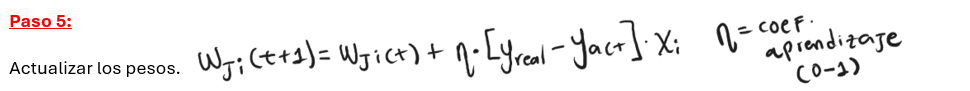

Por tanto si eta es pequeño, la actualización del peso siguiente es mínima (osea parecida a la actual), por ende lo más probable es que el error casi no disminuya (proporción muy baja) y esto entonces termine viendose reflejado en una convergencia bastante lenta. De hecho, en este caso no alcanza el valor de 0 para la cantidad de iteraciones configuradas.



Se presenta entonces el cambio del error para cada época:

Text(0, 0.5, 'Número de actualizaciones')

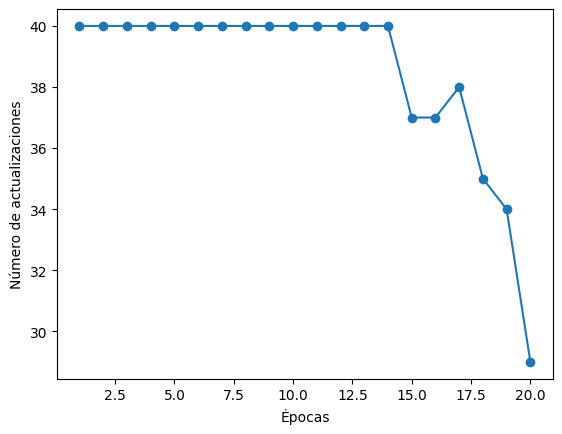

In [28]:
plt.plot(range(1, len(ppn_2.errors_) + 1), ppn_2.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

# **Pintando los datos de x_train, x_test y superficie de separación para éste modelo Perceptrón #2 (ppn_2):**

Observe como a continuación se ha realizado exactamente el mismo gráfico visto en el modelo anterior, solo que este caso graficaremos rapidamente tanto los datos de entrenamiento (x_train) y los de testeo (x_test) y a su vez el plano de separación de este nuevo modelo **Peceptrón #2 (ppn_2)**.

Evidentemente, se puede percatar, como la solución brindada por **Peceptrón #2 (ppn_2)** no permite de manera adecuada generar una separabilidad entre ambas clases incluso para las datos de testeo (QUE JAMÁS FUERON INCLUIDOS EN EL PROCESO DE ENTRENAMIENTO).

Por tanto (era de esperar dado que el error no dió 0 para este modelo), que el desempeño de la máquina no sea el mejor (se verá más adelante).



In [29]:
b=ppn_2.w_historical[-1][0]
w1=ppn_2.w_historical[-1][1]
w2=ppn_2.w_historical[-1][2]
w3=ppn_2.w_historical[-1][3]

In [30]:
# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
best_features_titles = ['Longitud del Sépalo (cm)', 'Ancho del Sépalo (cm)', 'Longitud del Pétalo (cm)']

# Aquí debes definir adecuadamente tus valores x_test y y_test
# Supongamos que ya tienes definidos tus datos de prueba
x_test = x_test
y_test = y_test

# Crear puntos para el plano
x_plane = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10)
y_plane = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de entrenamiento
for label in np.unique(y_train):
    fig.add_trace(go.Scatter3d(
        x=x_train[y_train == label, 0],
        y=x_train[y_train == label, 1],
        z=x_train[y_train == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Añadir los puntos de prueba
for label in np.unique(y_test):
    fig.add_trace(go.Scatter3d(
        x=x_test[y_test == label, 0],
        y=x_test[y_test == label, 1],
        z=x_test[y_test == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]}) TEST'
    ))

# Añadir el plano
# Aquí debes definir adecuadamente los coeficientes del plano (w1, w2, w3, b)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features_titles[0]),
        yaxis=dict(title=best_features_titles[1]),
        zaxis=dict(title=best_features_titles[2])
    ),
    title='Gráfico 3D para las clases Iris Setosa e Iris Versicolor'
)

# Mostrar la figura interactiva
fig.show()


Observe con cuidado, como de la imagen de arriba se puede percatar que en este caso en particular no se genera una separabilidad entre clases efectiva por el **Perceptrón #2 (ppn_2)** al no tener una convergencia perfecta, genera un hiperplano de separabilidad pero, se ve bastante afectado **la clase 1 (Iris Versicolor)**, mientras que **la clase 0 (Iris setosa)** solo se ve afectada en una única muestra.

 Si detalla, los puntos negros (Datatest clase 1) entonces van a ser mal clasificados, mientras que los puntos amarillos (Datatest clase 0) serán perfectamente clasificados.

**Observemos esto a continuación, mediante la matriz de confusión:**

# Evaluando a **Peceptrón #2 (ppn_2)** :

Evaluar el modelo entrenado **Peceptrón #2 (ppn_2)** con los valores de el **Testing Dataset** para validar posteriormente el desempeño del modelo.

In [31]:
y_predictions_ppn_2 = ppn_2.predict(x_test)

print(y_predictions_ppn_2)
print(y_test)

[0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


A continuación, usando la matriz de confusión de la librería de ciencia de datos scikit-learn, se procede a calcular la matriz de confusión:

In [32]:
# Calcula la matriz de confusión
cm_ppn_2 = confusion_matrix(y_test, y_predictions_ppn_2)
cm_ppn_2 = cm_ppn_2

print(cm_ppn_2)

[[10  0]
 [ 6  4]]


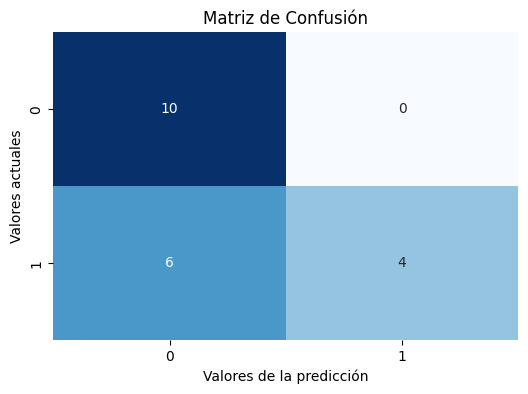

In [33]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

Como era de esperarse y se había mencionado anterioremente, los datos de prueba (test) para la Clase 1 no fueron bien clasificados del todo (Debido a la superficie de separación generada por el **Perceptrón #2 (ppn_2)**. Por otro lado, como ya se había mencionado, para el caso de la clase 0, todas las predicciones fueron perfectas.

**Analizando los resultados:  [COMO SE LEE LA MATRIZ DE CONFUSIÓN]**

1.   10 muestras actuales de la clase 0, fueron clasificadas como valor de predicción 0, es decir perfecto, y ninguna como clase 1.

2.   6 muestras actuales de la clase 1, fueron clasificadas como valor de predicción de la clase 0, es decir clasificaciones erroneas, mientras que 4 muetras actuales de la clase 1, fueron clasificadas como valor de predicción de las clase 1, es decir predicción correcta.



**Lo anteriormente mencionado, es totalmente claro también en la siguiente gráfica:**

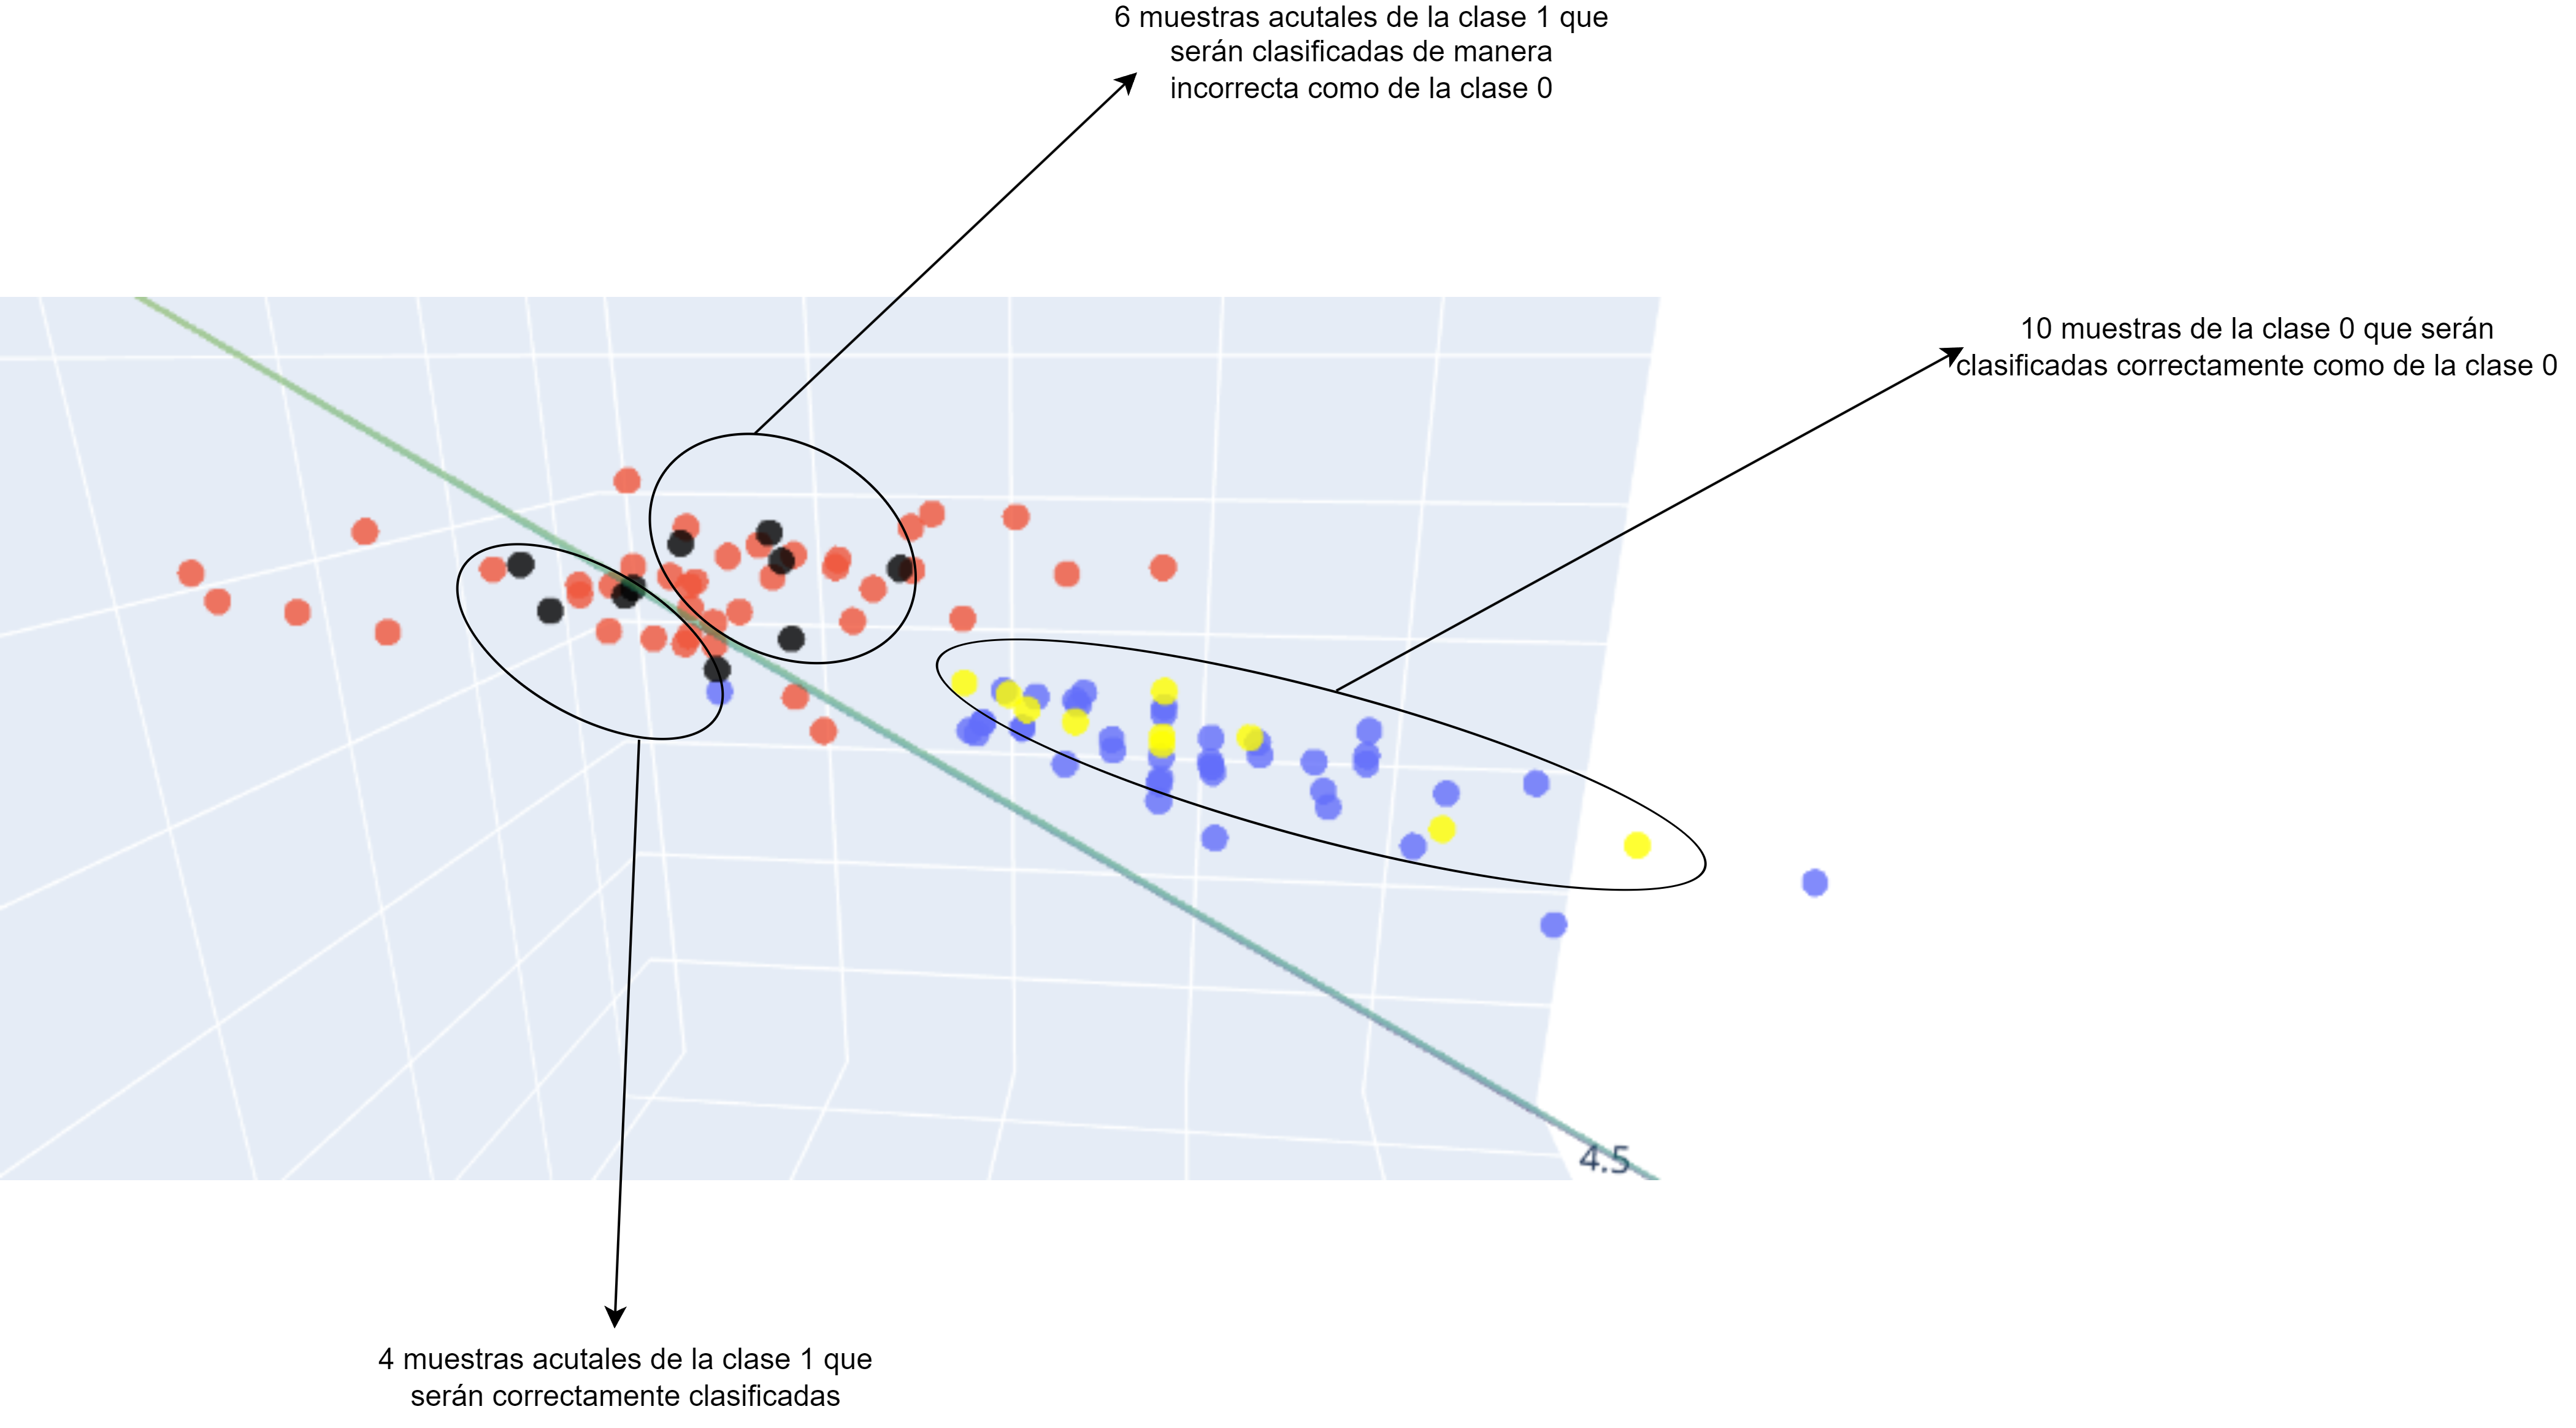


A continuación entonces, se procede a calcular las métricas asociadas:

In [34]:
metrics_ppn_2 =metricas_matriz_confusion(cm_ppn_2)

In [35]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_2.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_2.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_2.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_2.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_2.especificity))

El valor de exactitud (accuracy) es: 0.7
El valor de tasa de error (error_rate) es: 0.3
El valor de precisión (precision) es: 1.0
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.4
El valor de especificidad (especificity) es: 1.0


# **3-Entrenamiento de modelo de aprendizaje de máquina tipo Adaline:**

A continuación se presenta el nuevo modelo **Adaline #1 (ada_1)**.


In [137]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |cost_  : list
      Valro de la función de costo de suma de cuadrados en cada época.


    """
    #FUNCIÓN PARA INICIALIZAR MI ADALINE
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Datos de entrenamiento para ajustar.

          Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)


        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            #Se calcula la NETA para todos los valores de entrada
            net_input = self.net_input(X)

            #Observe por favor que a continuación se llama a la función de activación
            #Pero en realidad no tiene efecto, se podría colocar directamente:
            #output = self.net_input(X)
            #Pero el propósito es dejar dispuesto el código para usar la función de activación en otros casos.
            output = self.activation(net_input)

            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)

            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula el valor neto (Z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Función de activación lineal"""
        return X

    def predict(self, X):
        """Retonar el valor de clase perteneciente"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)

EL descenso del grandiente es uno de los tantos métodos que se benefician del escalado de características. En particular la **normalización** consiste en hacer que los datos de entrada (Características) tengan una distribución normal estándar, es decir: media cero (0) y desviación estándar uno (1).

Para lograrlo, podemos usar:

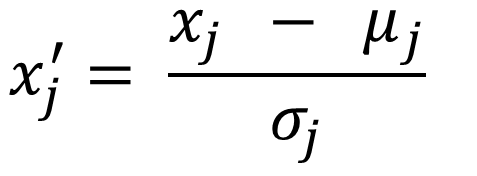

Antes de estandarizar:

In [138]:
print(X)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

Estandarizando:

In [139]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

print(X_std)

[[-5.81065904e-01  8.41837140e-01 -1.01297765e+00]
 [-8.94308978e-01 -2.07835104e-01 -1.01297765e+00]
 [-1.20755205e+00  2.12033793e-01 -1.08231219e+00]
 [-1.36417359e+00  2.09934449e-03 -9.43643106e-01]
 [-7.37687441e-01  1.05177159e+00 -1.01297765e+00]
 [-1.11201292e-01  1.68157493e+00 -8.04974023e-01]
 [-1.36417359e+00  6.31902691e-01 -1.01297765e+00]
 [-7.37687441e-01  6.31902691e-01 -9.43643106e-01]
 [-1.67741667e+00 -4.17769553e-01 -1.01297765e+00]
 [-8.94308978e-01  2.09934449e-03 -9.43643106e-01]
 [-1.11201292e-01  1.26170604e+00 -9.43643106e-01]
 [-1.05093052e+00  6.31902691e-01 -8.74308565e-01]
 [-1.05093052e+00 -2.07835104e-01 -1.01297765e+00]
 [-1.83403820e+00 -2.07835104e-01 -1.22098127e+00]
 [ 5.15284858e-01  1.89150938e+00 -1.15164673e+00]
 [ 3.58663321e-01  2.73124718e+00 -9.43643106e-01]
 [-1.11201292e-01  1.68157493e+00 -1.08231219e+00]
 [-5.81065904e-01  8.41837140e-01 -1.01297765e+00]
 [ 3.58663321e-01  1.47164049e+00 -8.04974023e-01]
 [-5.81065904e-01  1.47164049e+

In [161]:
x_train_2, x_test_2, y_train_2, y_test_2= train_test_split(X_std, y, test_size= 0.2, random_state=0)

In [176]:
ada_1 = AdalineGD(n_iter=250, eta=0.01)

In [177]:
ada_1.fit(x_train_2, y_train_2)

In [178]:
print(ada_1.w_)

[ 0.50051041 -0.03464099 -0.07021188  0.4723872 ]


In [179]:
b=ada_1.w_[0]
w1=ada_1.w_[1]
w2=ada_1.w_[2]
w3=ada_1.w_[3]

print(b)
print(w1)
print(w2)
print(w3)

0.500510407230907
-0.03464098842063624
-0.07021188327575671
0.4723872023750123


In [180]:
# Crear puntos para el plano
x_plane = np.linspace(x_train_2[:, 0].min(), x_train_2[:, 0].max(), 10)
y_plane = np.linspace(x_train_2[:, 1].min(), x_train_2[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de entrenamiento
for label in np.unique(y_train_2):
    fig.add_trace(go.Scatter3d(
        x=x_train_2[y_train_2 == label, 0],
        y=x_train_2[y_train_2 == label, 1],
        z=x_train_2[y_train_2 == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Añadir los puntos de prueba
for label in np.unique(y_test_2):
    fig.add_trace(go.Scatter3d(
        x=x_test_2[y_test_2 == label, 0],
        y=x_test_2[y_test_2 == label, 1],
        z=x_test_2[y_test_2 == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]}) TEST'
    ))

# Añadir el plano
# Aquí debes definir adecuadamente los coeficientes del plano (w1, w2, w3, b)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features_titles[0]),
        yaxis=dict(title=best_features_titles[1]),
        zaxis=dict(title=best_features_titles[2])
    ),
    title='Gráfico 3D para las clases Iris Setosa e Iris Versicolor'
)

# Mostrar la figura interactiva
fig.show()


In [181]:
print(ada_1.cost_)

[19.813612160786107, 5.311346811534765, 2.4960000194166145, 1.4260024789625463, 0.963116336145119, 0.7518783187080385, 0.6481957515836285, 0.5916439792086934, 0.556644970832086, 0.5322378302807496, 0.5136159815296212, 0.49857981417360664, 0.4860472283867862, 0.4754263675498954, 0.46634986855924154, 0.458560921464261, 0.45186326654040715, 0.4460982820469473, 0.4411336893510993, 0.43685735819739535, 0.4331734504682422, 0.42999971792357367, 0.4272654337173809, 0.42490971901550745, 0.42288014681288716, 0.42113155810803654, 0.4196250499530209, 0.41832710694328856, 0.4172088543459319, 0.41624541521273317, 0.4154153567413571, 0.4147002133862948, 0.414084076034405, 0.4135532380739059, 0.4130958904698899, 0.412701859057403, 0.41236237820556215, 0.4120698958166542, 0.4118179053218155, 0.4116008009356872, 0.4114137529499716, 0.41125260029163396, 0.41111375795558697, 0.4109941372525965, 0.4108910770982416, 0.4108022848143801, 0.41072578512618596, 0.4106598762201498, 0.4106030918855015, 0.410554168

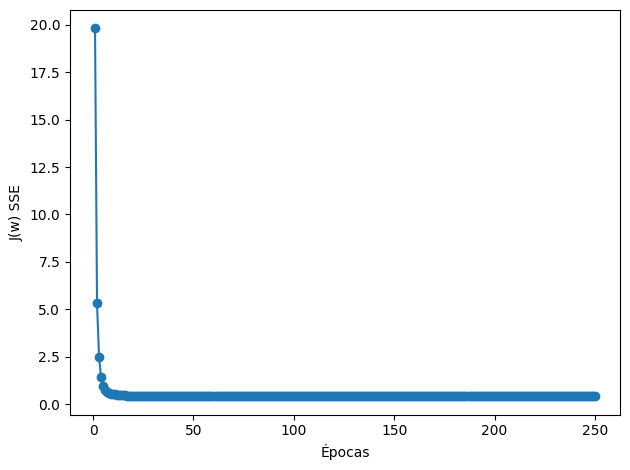

In [182]:
plt.plot(range(1, len(ada_1.cost_) + 1), ada_1.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

In [183]:
y_predictions_ada_1 = ada_1.predict(x_test_2)

In [184]:
# Calcula la matriz de confusión
cm_ada_1 = confusion_matrix(y_test_2, y_predictions_ada_1)

print(cm_ada_1)


[[ 3  7]
 [ 0 10]]


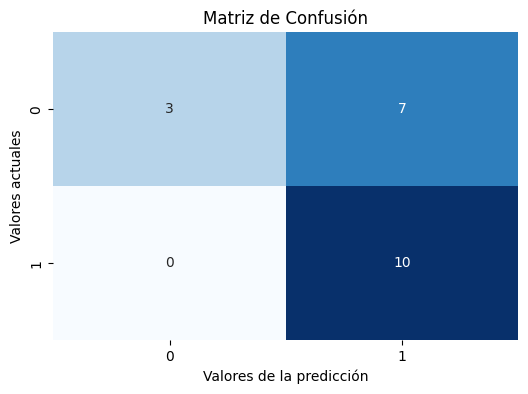

In [185]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [186]:
metrics_ada_1 =metricas_matriz_confusion(cm_ada_1)

print("El valor de exactitud (accuracy) es: " + str(metrics_ada_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ada_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ada_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ada_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ada_1.especificity))

El valor de exactitud (accuracy) es: 0.65
El valor de tasa de error (error_rate) es: 0.35
El valor de precisión (precision) es: 0.5882352941176471
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 1.0
El valor de especificidad (especificity) es: 0.3
